In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

## Data Loading

In [2]:
trainingData = pd.read_csv('data.csv')
trainingData.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Data Preprocessing

In [4]:
# dropping columns
trainingData = trainingData.drop(columns = ['id', 'CustomerId', 'Surname'])
trainingData.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Data Analysis

<Axes: >

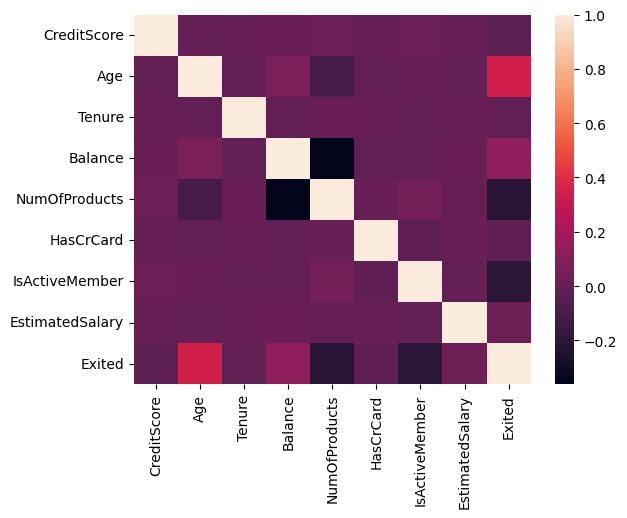

In [17]:
# data correlation
sns.heatmap(trainingData.corr())

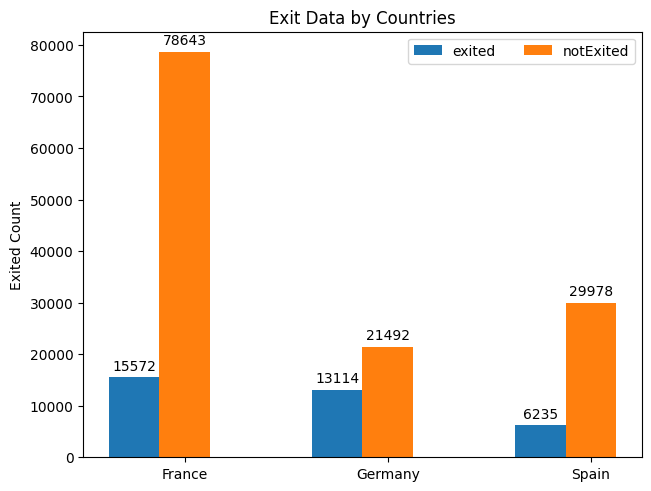

In [63]:
# country vs exited
countries = tuple(np.unique(trainingData["Geography"]))
exitData = {
    'exited': [0] * len(countries),
    'notExited': [0] * len(countries)
}

for i in range(len(countries)):
  data = np.where(trainingData['Geography'] == countries[i])[0]
  for j in range(data.shape[0]):
    if trainingData.iloc[data[j]][-1] == 0:
      exitData['notExited'][i] += 1
    else:
      exitData['exited'][i] += 1

x = np.arange(len(countries))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained')

for country, exit in exitData.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, exit, width, label=country)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Exited Count')
ax.set_title('Exit Data by Countries')
ax.set_xticks(x + width, countries)
ax.legend(loc='upper right', ncols=3)

plt.show()

In [106]:
# average age of people who exited
ages = []
for i in range(trainingData.shape[0]):
  if trainingData.iloc[i][-1] == 1:
    ages.append(trainingData.iloc[i]['Age'])

print(f"Minimum age of customer: {np.min(trainingData['Age'])}")
print(f"Maximum age of customer: {np.max(trainingData['Age'])}")
print(f"Average age of people who exited: {np.mean(ages)}")

Minimum age of customer: 18.0
Maximum age of customer: 92.0
Average age of people who exited: 37.634068062265165


In [70]:
# average credit score of people who exited
credScores = []
for i in range(trainingData.shape[0]):
  if trainingData.iloc[i][-1] == 1:
    credScores.append(trainingData.iloc[i]['CreditScore'])
print(f"Minimum Credit Score: {np.min(trainingData['CreditScore'])}")
print(f"Maximum Credit Score: {np.max(trainingData['CreditScore'])}")
print(f"Average Credit Score of people who exited: {np.mean(credScores)}")

Minimum Credit Score: 350
Maximum Credit Score: 850
Average Credit Score of people who exited: 652.2204690587325


## Data Preparation

In [72]:
trainingData.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [73]:
trainingData = pd.get_dummies(trainingData)
trainingData.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1


In [88]:
target = trainingData['Exited']
features = trainingData.drop(columns = ['Exited'])

X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True)

## Model Training

### Logsitic Regression

In [91]:
# basic logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### XGBoost Classifier

In [92]:
# basic XGBoost Classification
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [108]:
def evaluation(y_true, y_pred):
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_true, y_pred)
  acc = accuracy_score(y_true, y_pred)

  return {'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Accuracy': acc}

In [109]:
# evaluating logistic regression model
y_predLR = lr.predict(X_test)
print(f"Scores for Logistic Regression Model: {evaluation(y_test, y_predLR)}")

Scores for Logistic Regression Model: {'Precision': 0.4936945352638954, 'Recall': 0.1218162959548231, 'F1 Score': 0.19541504899242004, 'Accuracy': 0.7890399670374949}


In [110]:
# evaluating XGBoost Classifier
y_predXGB = xgb.predict(X_test)
print(f"Scores for XGBoost Classifier: {evaluation(y_test, y_predXGB)}")

Scores for XGBoost Classifier: {'Precision': 0.7442648190916089, 'Recall': 0.5571049902039875, 'F1 Score': 0.6372264698128131, 'Accuracy': 0.8665988026854747}
